# Árbol de decisión


Utilizamos el dataset de las plantas Iris desde esta ubicación:
https://www.openml.org/data/get_csv/61/dataset_61_iris.arff

Para ello, separaremos nuestro dataset: usaremos un 80% de los datos para entrenar los algoritmos y un 20% de los datos para hacer los tests de predicción. Ésta suele ser una proporción habitual.


Cargamos las librerías necesarias:

In [25]:
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Cargamos el dataset:

In [26]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"

In [27]:
dataset = read_csv(url)

Dividimos el dataset en 80% de datos para entrenar y 20% para test:

In [28]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [29]:
print(dataset)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


Realizamos predicciones con el dataset de validación:

In [30]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

Damos detalles sobre el modelo:

In [31]:
print(model)

DecisionTreeClassifier()


Evaluamos las predicciones, en primer lugar la precisión obtenida:

In [32]:
print(accuracy_score(Y_validation, predictions))

0.9666666666666667


Ahora la matriz de confusión:

In [33]:
print(confusion_matrix(Y_validation, predictions))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


Un informe de clasificación:

In [34]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Predicción de ejemplo:

In [35]:
print(model.predict([[6.0, 3.0, 5.0, 2.0]]))

['virginica']


Dibujamos el árbol:

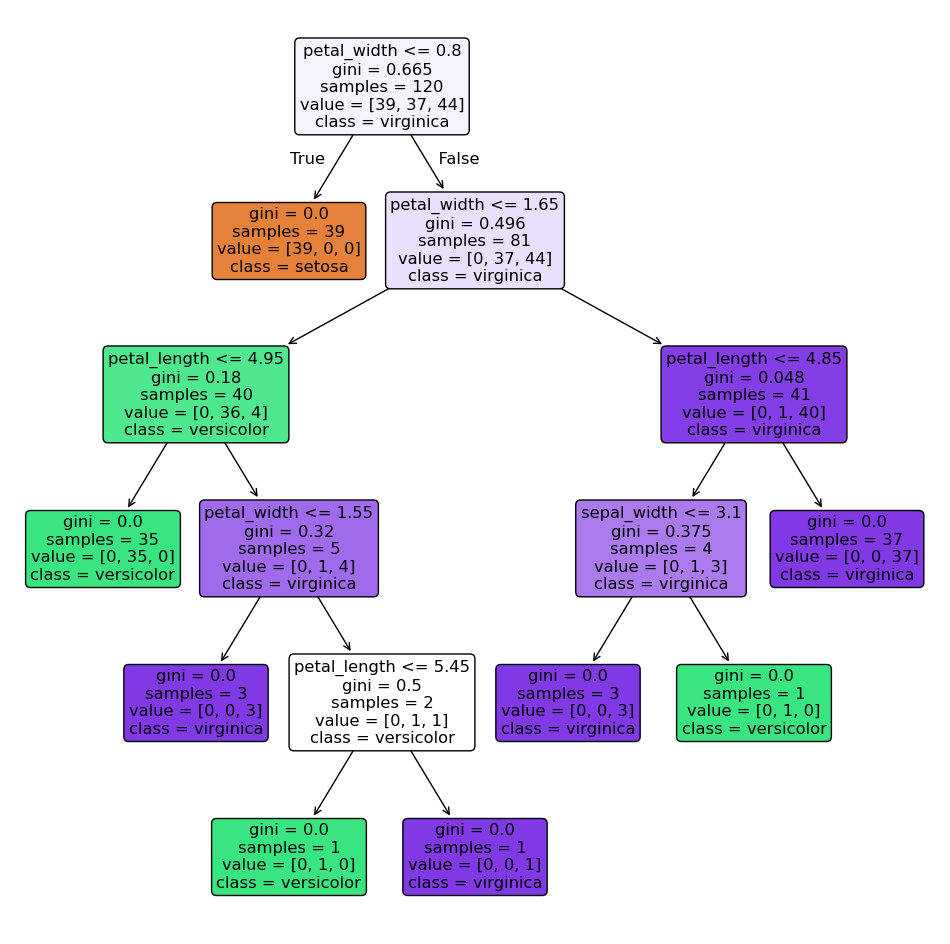

In [36]:
plt.figure(figsize=(12, 12))  # Ajusta el tamaño según lo necesites
tree.plot_tree(
    model,
    feature_names=dataset.columns.values[0:4],
    class_names=["setosa", "versicolor", "virginica"],
    filled=True,
    rounded=True
)
plt.show()